In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support
import tensorflow
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### os.listdir() method in python is used to get the list of all files and directories in the specified directory.

In [2]:
path = os.listdir('E:/Gollege/Semester 5/Data Sciences Tools/Project/melanoma_cancer_dataset/train/')
classes ={'benign':0 , 'malignant':1}
print(path)

['benign', 'malignant']


##### OpenCV-Python is a library of Python bindings designed to solve computer vision problems. 

In [3]:
X=[]
Y=[]
for cls in classes:
    pth = 'E:/Gollege/Semester 5/Data Sciences Tools/Project/melanoma_cancer_dataset/train/'+cls
    for img in os.listdir(pth):
        image= cv2.imread(pth+'/'+img,0)
        image= cv2.resize(image,(200,200))
        X.append(image)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y= np.array(Y)

##### to count how many images are in each class

In [5]:
pd.Series(Y).value_counts()

0    5000
1    4605
dtype: int64

<AxesSubplot:title={'center':'data distribution '}, xlabel='Type of skin cancer', ylabel='Number of image'>

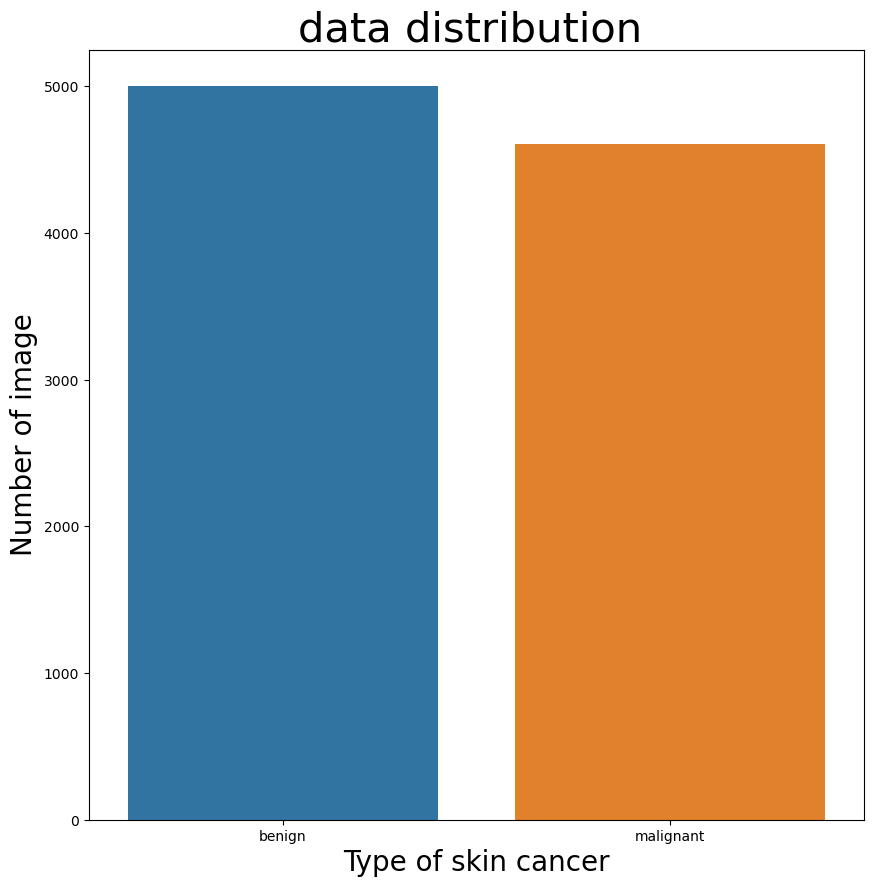

In [6]:
plt.figure(figsize=(10,10))
plt.title('data distribution ',fontsize=30)
plt.ylabel('Number of image',fontsize=20)
plt.xlabel('Type of skin cancer',fontsize=20)

keys = list(path)
vals = list(pd.Series(Y).value_counts())
sns.barplot(x=keys, y=vals)

##### the shape (9605, 200, 200) suggests a three-dimensional array with 9605 slices, where each slice is a 2D array of size 200x200(width x Height).

In [7]:
X.shape

(9605, 200, 200)

## Visulize one image 

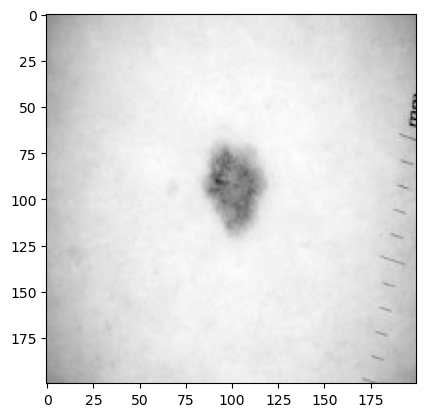

In [8]:
plt.imshow(X[0], cmap="gray")

### Prepare data
##### converting it to 2-D from 3-D array
##### Note: We can reshape an array although we don’t know all the new dimensions by using -1 as one of the dimensions

In [9]:
X_Updated = X.reshape(len(X),-1)
X_Updated.shape

(9605, 40000)

### Split data

In [10]:
xtrain,xtest, ytrain,ytest = train_test_split(X_Updated,Y,random_state=10,test_size=0.20)

In [11]:
xtrain.shape , xtest.shape

((7684, 40000), (1921, 40000))

## Normalization
##### Note: Normalization helps get data within a range and reduces the skewness which helps learn faster and better. Normalization can also tackle the diminishing and exploding gradients problems.

In [12]:
xtrain = xtrain/255
xtest = xtest/255

## PCA

##### To determine number of components

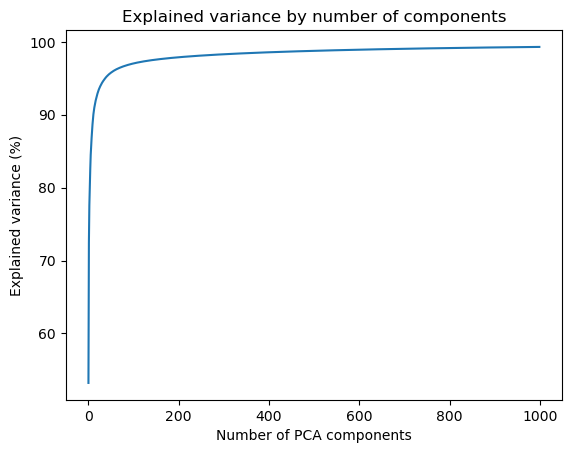

In [23]:
pca = PCA(n_components=1000).fit(xtrain) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance in percents
explained_variance_percent = [100 * i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance by number of components')
ax.set_ylabel('Explained variance (%)')
ax.set_xlabel('Number of PCA components')

# Cumulative sum of the explained variance
ax.plot(components, np.cumsum(explained_variance_percent)) 

### Dimensionality Reduction

##### Note: fit(): calculating the mean and variance of each of the features present in our data.
##### transform(): transforming all the features using the respective mean and variance.
##### fit_transform(): does both fits and transform.
##### so now Why we use fit_transform() on training data but transform() on the test data?
##### fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

In [13]:
pca = PCA(n_components=200)
 
X_train = pca.fit_transform(xtrain)
X_test = pca.transform(xtest)


In [14]:
X_train.shape

(7684, 200)

## CNN Model

In [13]:
# Reshape the input data for CNN
x_train = xtrain.reshape(xtrain.shape[0], 200, 200, 1)
x_test = xtest.reshape(xtest.shape[0], 200, 200, 1)

In [18]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
Model = model.fit(x_train, ytrain, epochs=10, validation_data=(x_test, ytest))

Epoch 1/10
241/241 [==============================] - 397s 2s/step - loss: 0.4957 - accuracy: 0.7441 - val_loss: 0.4061 - val_accuracy: 0.8058
Epoch 2/10
241/241 [==============================] - 385s 2s/step - loss: 0.3582 - accuracy: 0.8312 - val_loss: 0.3600 - val_accuracy: 0.8319
Epoch 3/10
241/241 [==============================] - 395s 2s/step - loss: 0.3338 - accuracy: 0.8445 - val_loss: 0.3604 - val_accuracy: 0.8319
Epoch 4/10
241/241 [==============================] - 371s 2s/step - loss: 0.3167 - accuracy: 0.8550 - val_loss: 0.2975 - val_accuracy: 0.8693
Epoch 5/10
241/241 [==============================] - 409s 2s/step - loss: 0.2998 - accuracy: 0.8663 - val_loss: 0.3091 - val_accuracy: 0.8605
Epoch 6/10
241/241 [==============================] - 409s 2s/step - loss: 0.2889 - accuracy: 0.8719 - val_loss: 0.2823 - val_accuracy: 0.8782
Epoch 7/10
241/241 [==============================] - 343s 1s/step - loss: 0.2781 - accuracy: 0.8799 - val_loss: 0.2907 - val_accuracy: 0.8709

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, ytest)
print(f'Test accuracy: {test_acc}')

61/61 [==============================] - 16s 262ms/step - loss: 0.2958 - accuracy: 0.8673
Test accuracy: 0.8672566413879395


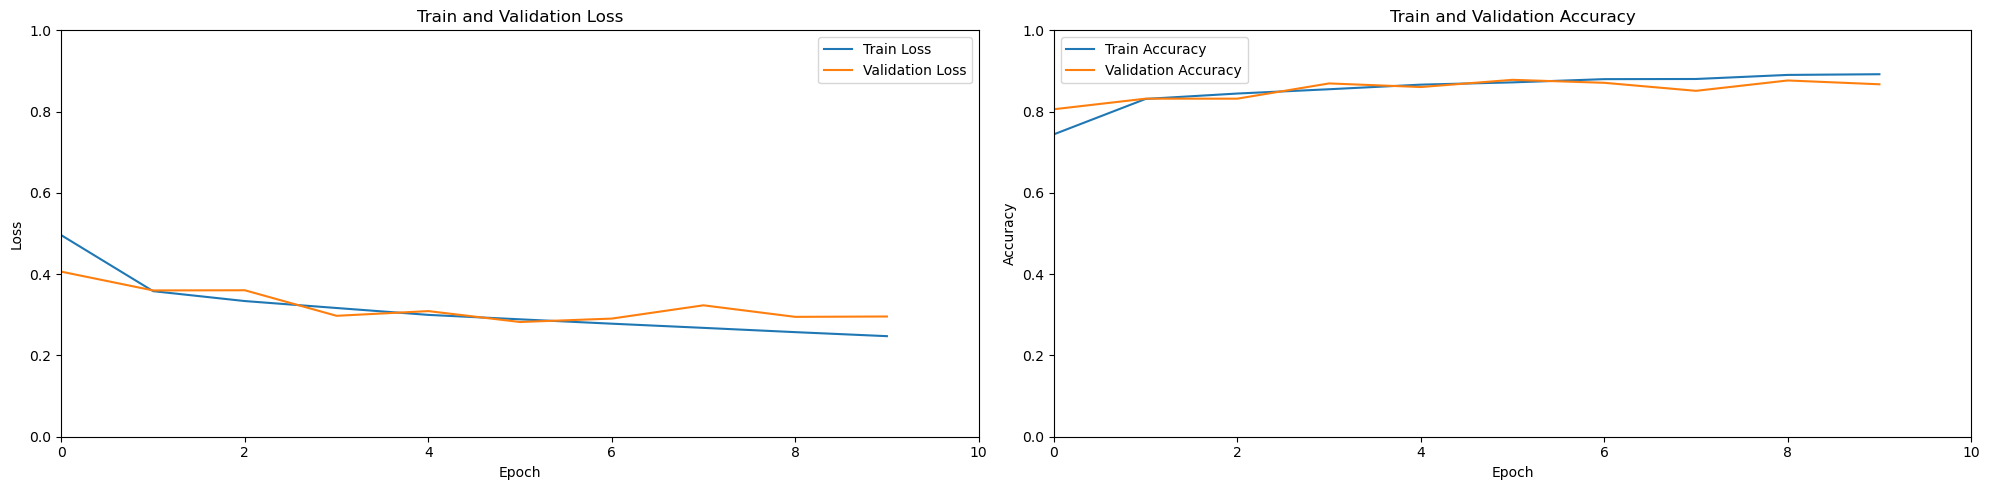

In [20]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(Model.history['loss'],label="Train Loss")
plt.plot(Model.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(Model.history['accuracy'], label="Train Accuracy")
plt.plot(Model.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [22]:
# Make predictions
y_prediction = model.predict(x_test)
y_prediction = (y_prediction > 0.5)

# Classification report
print("Classification Report:")
print(classification_report(ytest, y_prediction))

61/61 [==============================] - 16s 254ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1047
           1       0.87      0.84      0.85       874

    accuracy                           0.87      1921
   macro avg       0.87      0.86      0.87      1921
weighted avg       0.87      0.87      0.87      1921



In [23]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_prediction))

Confusion Matrix:
[[933 114]
 [141 733]]


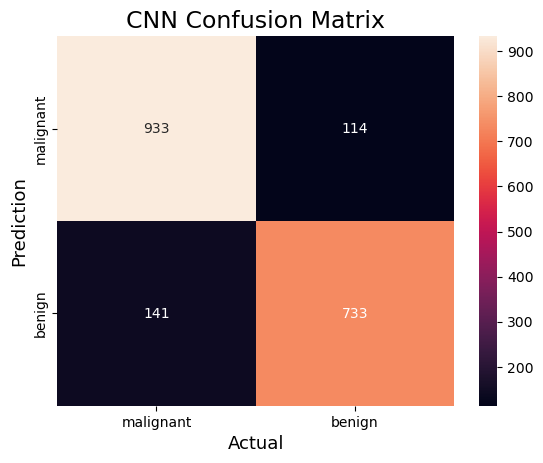

In [24]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix(ytest, y_prediction),annot=True,fmt='g',
xticklabels=['malignant', 'benign'],
yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('CNN Confusion Matrix',fontsize=17)
plt.show()

In [25]:
# ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_prediction)
auc = roc_auc_score(ytest, y_prediction)

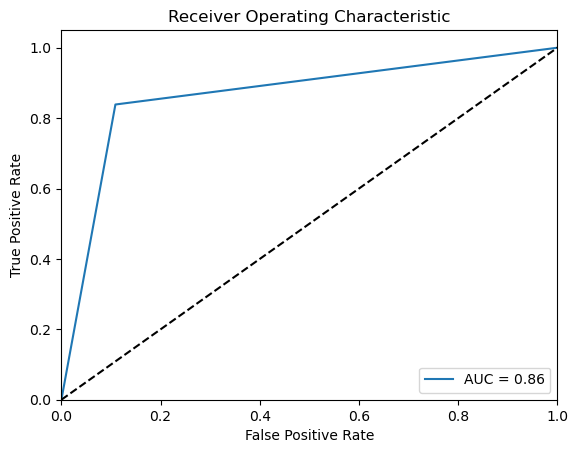

In [26]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## SVM Model

In [27]:
# Standardize the features (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_model.fit(X_train, ytrain)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Access the coefficients
coefficients = svm_model.coef_

# Print the coefficients
print("Coefficients:\n", coefficients)

Accuracy: 79.49%
Coefficients:
 [[-0.03715692 -0.03899965 -0.00875289 ... -0.01649598  0.04134931
   0.1051195 ]]


In [28]:
# Assuming ytest and y_pred are the true and predicted labels, respectively
classes = np.unique(np.concatenate((ytest, y_pred)))

# Compute precision, recall, F1-score, and support for each class
precision, recall, f1, support = precision_recall_fscore_support(ytest, y_pred, labels=classes, average=None)

# Create a dictionary to store the results
results = {
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
}

# Print the F1-score matrix and accuracy
print("F1-Score Matrix:")
print(pd.DataFrame(results, index=classes))
print("\nAccuracy:", accuracy)


F1-Score Matrix:
   Precision    Recall  F1-Score  Support
0   0.797088  0.836676  0.816403     1047
1   0.791971  0.744851  0.767689      874

Accuracy: 0.7948984903695991


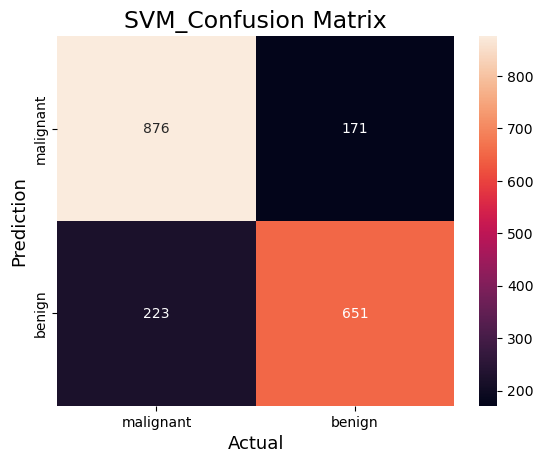

In [29]:
#Plot the confusion matrix.###
sns.heatmap(confusion_matrix(ytest, y_pred),annot=True,fmt='g',
xticklabels=['malignant', 'benign'],
yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SVM_Confusion Matrix',fontsize=17)
plt.show()

In [32]:
# ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
auc = roc_auc_score(ytest, y_pred)

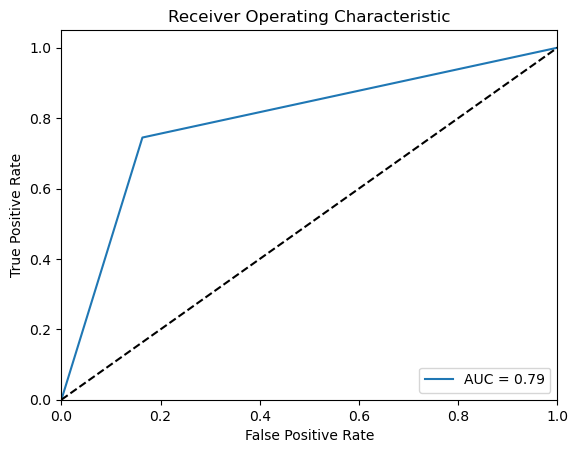

In [33]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Comparison

In [34]:
#Comparing models accuracy
results=pd.DataFrame({'Model':['CNN','SVM'],
                     'Accuracy Score':[test_acc,accuracy]})
result_comparison=results.sort_values(by='Accuracy Score', ascending=False)
result_comparison=result_comparison.set_index('Model')
result_comparison

,Accuracy Score
Model,
CNN,0.867257
SVM,0.794898


In [35]:
# Select the best performing model
if test_acc > accuracy :
    print('CNN is the best performing model.')
    print('CNN_accuracy:', test_acc)
    
else:
    print('SVM is the best performing model.')
    print('SVM_accuracy:', accuracy)

CNN is the best performing model.
CNN_accuracy: 0.8672566413879395


## Perdiction

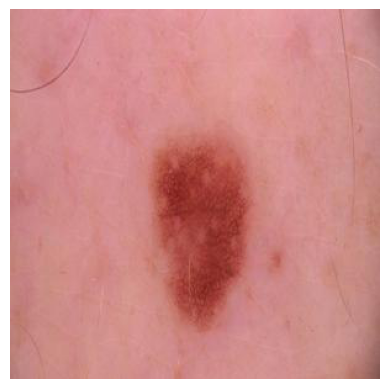

1/1 [==============================] - 1s 1s/step
The image is predicted as benign.


In [36]:
from PIL import Image
import numpy as np

try:
    image = Image.open('E:/Gollege/Semester 5/Data Sciences Tools/Project/melanoma_cancer_dataset/test/benign/melanoma_9632.jpg')

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Resize the input image to (200, 200)
    resized_image = image.resize((200, 200))

    # Convert the resized image to grayscale
    resized_image = resized_image.convert('L')

    # Convert the resized image to a numpy array
    image_array = np.array(resized_image)

    # Reshape the input image for CNN
    image_array = image_array.reshape(1, 200, 200, 1)

    # Normalize the input image
    image_array = image_array / 255.0

    # Make prediction
    prediction = model.predict(image_array)

    # Convert the prediction to binary value (0 or 1)
    binary_prediction = np.round(prediction)[0][0]

    # Print the prediction
    if binary_prediction == 0:
        print("The image is predicted as benign.")
    else:
        print("The image is predicted as malignant.")
except FileNotFoundError:
    print("Image file not found.")
except Exception as e:
    print("An error occurred:", str(e))